<a href="https://colab.research.google.com/github/malick741/MACHINE-LEARNING/blob/main/Prediction_Prix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [45]:
df0=pd.read_csv('/content/train.csv')
df=df0.copy()
dfT=pd.read_csv('/content/test.csv')
df1=dfT.copy()

In [46]:
def procedd(df):
    df.drop(df[['PoolQC','Fence','MiscFeature','Alley']],axis=1,inplace=True)
    df.drop_duplicates(inplace=True)
    df['Electrical']=df['Electrical'].ffill()
    df[['FireplaceQu','MasVnrType','BsmtQual','MasVnrArea']]=df[['FireplaceQu','MasVnrType','BsmtQual','MasVnrArea']].fillna('0')
    df[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2'  ]]=df[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2'  ]].fillna('0')
    df[['GarageType', 'GarageYrBlt','GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'  ]]=df[['GarageType', 'GarageYrBlt','GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'  ]].fillna('0')
    df['GarageYrBlt']=df['GarageYrBlt'].astype(int)
    df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
    
    return df
df=procedd(df0)





def procedd(df1):
    df1.drop(df1[['PoolQC','Fence','MiscFeature','Alley']],axis=1,inplace=True)
    df1.drop_duplicates(inplace=True)
    df1['Electrical']=df1['Electrical'].ffill()
    df1[['FireplaceQu','MasVnrType','BsmtQual','MasVnrArea']]=df1[['FireplaceQu','MasVnrType','BsmtQual','MasVnrArea']].fillna('0')
    df1[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2'  ]]=df1[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2'  ]].fillna('0')
    df1[['GarageType', 'GarageYrBlt','GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'  ]]=df1[['GarageType', 'GarageYrBlt','GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'  ]].fillna('0')
    df1['GarageYrBlt']=df1['GarageYrBlt'].astype(int)
    df1['LotFrontage']=df1['LotFrontage'].fillna(df['LotFrontage'].mean())
    #df1.dropna(inplace=True)
    return df1
df1=procedd(df1)


encc=OrdinalEncoder()
x_train=df[['LotFrontage','LotArea', 'Neighborhood', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF','1stFlrSF', 'GrLivArea', 'GarageArea','Neighborhood','MSZoning','Condition1','HouseStyle','BsmtQual','Heating']]
x_test=df[['LotFrontage','LotArea', 'Neighborhood', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF','1stFlrSF', 'GrLivArea', 'GarageArea','Neighborhood','MSZoning','Condition1','HouseStyle','BsmtQual','Heating']]



x_train[['Neighborhood','MSZoning','Condition1','HouseStyle','BsmtQual','Heating']]=encc.fit_transform(x_train[['Neighborhood','MSZoning','Condition1','HouseStyle','BsmtQual','Heating']])
x_test[['Neighborhood','MSZoning','Condition1','HouseStyle','BsmtQual','Heating']]=encc.fit_transform(x_test[['Neighborhood','MSZoning','Condition1','HouseStyle','BsmtQual','Heating']])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [ ]:
y=df['SalePrice']

In [ ]:
del df['SalePrice']

In [48]:
RANDOM_SEED = 23
def gbr_objective(trial):
    _n_estimators = trial.suggest_int("n_estimators", 50, 2000)
    _learning_rate = trial.suggest_float("learning_rate", 0.01, 1)
    _max_depth = trial.suggest_int("max_depth", 1, 20)
    _min_samp_split = trial.suggest_int("min_samples_split", 2, 20)
    _min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 20)
    _max_features = trial.suggest_int("max_features", 10, 50)

    gbr = GradientBoostingRegressor(
        n_estimators=_n_estimators,
        learning_rate=_learning_rate,
        max_depth=_max_depth, 
        max_features=_max_features,
        min_samples_leaf=_min_samples_leaf,
        min_samples_split=_min_samp_split,
        
        random_state=RANDOM_SEED,
    )

    score = cross_val_score(
        gbr, X_train,y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    ).mean()
    return score






gbr_params = {'n_estimators': 1831, 'learning_rate': 0.01325036780847096, 'max_depth': 3, 'min_samples_split': 17, 'min_samples_leaf': 2, 'max_features': 12}
gbr = GradientBoostingRegressor(random_state=RANDOM_SEED, **gbr_params)
gbr.fit(x_train,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01325036780847096,
                          loss='ls', max_depth=3, max_features=12,
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=2,
                          min_samples_split=17, min_weight_fraction_leaf=0.0,
                          n_estimators=1831, n_iter_no_change=None,
                          presort='deprecated', random_state=23, subsample=1.0,
                          tol=0.0001, validation_fraction=0.1, verbose=0,
                          warm_start=False)

In [49]:
gbr.score(x_train,y)

0.9624415389178828

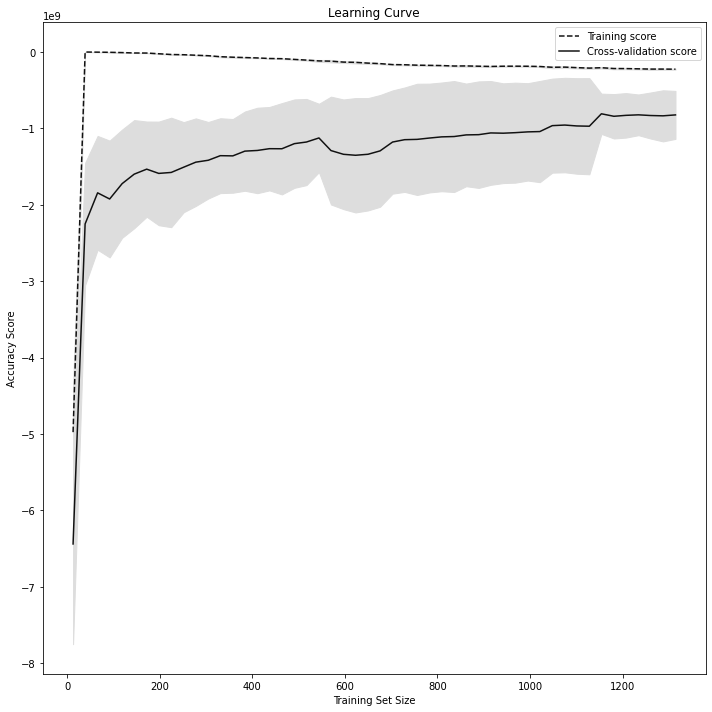

In [53]:
train_sizes, train_scores, test_scores=learning_curve(gbr,x_train,y,cv=10, scoring='neg_mean_squared_error',n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [55]:
y_pred=gbr.predict(x_test)